# 04 Method 1 - SVM Classifier on Term Frequency Data

In [34]:
import numpy as np #Handle computations 
import matplotlib.pyplot as plt #Visualisations
import pandas as pd #I/O

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, normalize, scale
from sklearn.svm import SVC #Support Vector Machine Classification
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, accuracy_score, auc

from scipy import sparse #I/O for .npz files (Scipy Sparse Matrices)

In [2]:
#Import the Processed Dataset and ratings

reviews_subset = sparse.load_npz('./data/reviews_subset_tfidf.npz')
ratings_subset = pd.read_csv('./data/ratings_subset.csv', header=None)


In [3]:
#Formatting
X = reviews_subset
y = np.asarray(ratings_subset)[:, 1]

In [5]:
# Training 50%, Testing 50%
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

1. Multinomial Naiive Bayes

In [6]:
from sklearn.naive_bayes import MultinomialNB

In [7]:
# Train a Multimoda Naive Bayes classifier
mnb_clf = MultinomialNB().fit(X_train, y_train)

In [16]:
# Predicting the Test set results, find accuracy
y_pred = mnb_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.48805

Multinomial Naive Bayes has less accuracy than flipping a coin.

2. Try linear svc

In [37]:
from sklearn.svm import LinearSVC

linsvc_clf = LinearSVC(multi_class='ovr')
linsvc_clf.fit(X_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [38]:
y_pred = linsvc_clf.predict(X_test)

In [39]:
metrics.accuracy_score(y_test, y_pred)

0.6179

A bit better than flipping a coin.

Use OneVsRest to populate ROC Curves and AUC values for SVC.

In [24]:
np.unique(y)

array([1., 2., 3., 4., 5.])

In [25]:
y_train_bin = label_binarize(y_train, classes=[1,2,3,4,5])
y_test_bin = label_binarize(y_test, classes=[1,2,3,4,5])

In [27]:
from sklearn.multiclass import OneVsRestClassifier

In [31]:
svm_ovr_clf = OneVsRestClassifier(LinearSVC(random_state=42))

y_score = svm_ovr_clf.fit(X_train, y_train_bin).decision_function(X_test)

In [35]:
n_classes = 5
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

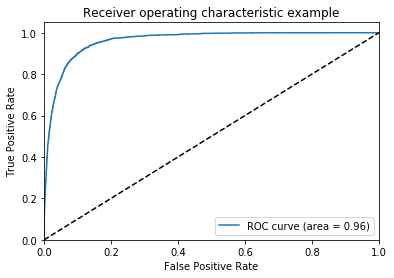

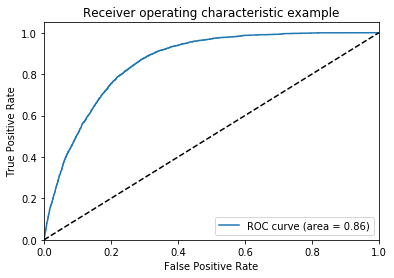

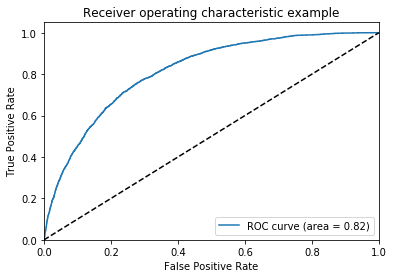

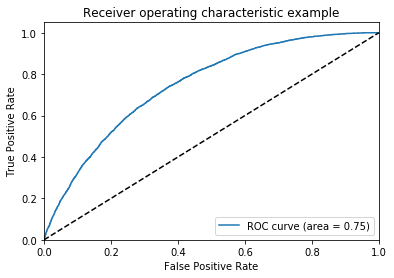

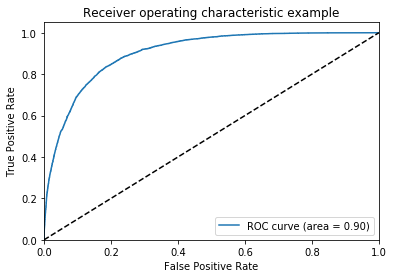

In [36]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()